## Logistic Regression

- Logistic regression is a special case of linear regression where the target variable is categorical in nature. (y변수가 카테고리 모형(discrete)일 때 사용하는 선형회귀분석이라고 생각)
- While the dependent variable (or in other words, the y variable) is binary (0 or 1), logistic regression predicts the probability of an binary event utilizing the logistic function.

### Linear Probability Model

- Consider the following linear regression model:
$$y_i = \beta_0 + \beta_1 X_{i} + \epsilon_i$$
where $y_i$ is a categorical variable.

- Linear Probability Model: Fit this model with OLS.

- There are three main reasons why LPM is not used.
    - (1) unbounded predicted probabilities
        - 예측확률이 0하고 1사이에서 갇혀있지 않음
    - (2) Non-normal errors
        - 에러의 형태가 정규모형이 아님
    - (3) Heteroskedasticity(이분산)
        - Mathematically, the variance can be expressed as a function of $X_i$
        - $\sigma_i^2 = (\beta_0 + \beta_1 X_{i})(1-\beta_0 - \beta_1 X_{i})$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

df = pd.read_csv('data/titanic.csv', index_col=0)
df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


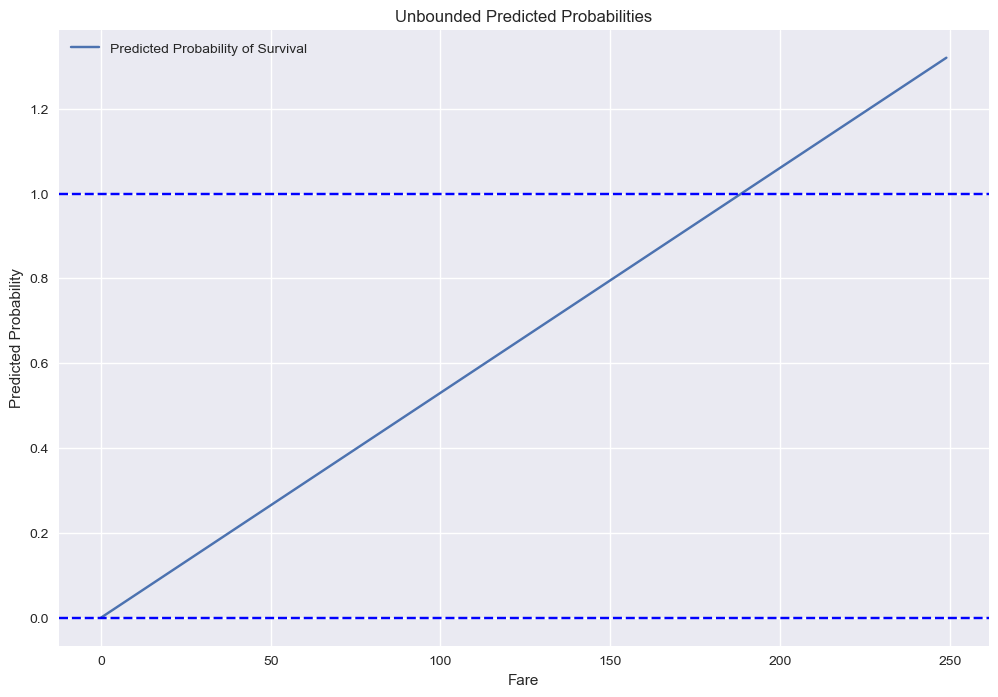

In [2]:
import statsmodels.api as sm

y = df.survived
X = df[['fare']]

ols = sm.OLS(y,X).fit()

plt.style.use('seaborn')
plt.figure(figsize=(12,8))
plt.plot(range(250), ols.predict(pd.Series(range(250))), label = 'Predicted Probability of Survival')
plt.axhline(y=1, color='b', ls = '--')
plt.axhline(y=0, color='b', ls = '--')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Predicted Probability')
plt.title('Unbounded Predicted Probabilities')
plt.show()

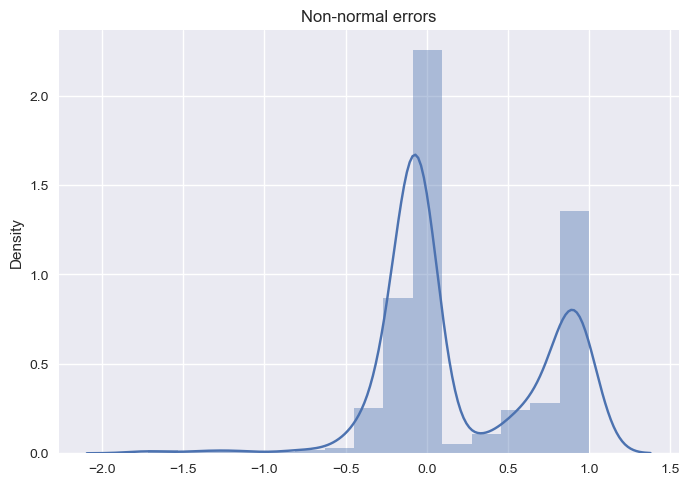

In [3]:
plt.figure()
sns.distplot(ols.resid)
plt.title('Non-normal errors')
plt.show()

### Logistic Regression

- Logistic regression transform the predicted value with the logistic function ($f(x) = {e^{x} \over {1 +e^{x}}}$).
- The logistic function (also called as sigmoid function) gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1.
    - 위에서 본 문제점인 0,1사이에 존재하지 않는다는 것을 해결한 것
- If the output of the logstic function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.
- Since we decide the outcome based on 0.5, it is also called as the "decision boundary".(결정 경계)
    -결정 경계는 우리가 다르게 기준을 잡을 수도 있다(풀려는 문제의 성격에 따라)
- Thus, the output can be interpreted as $P(y=1)$.

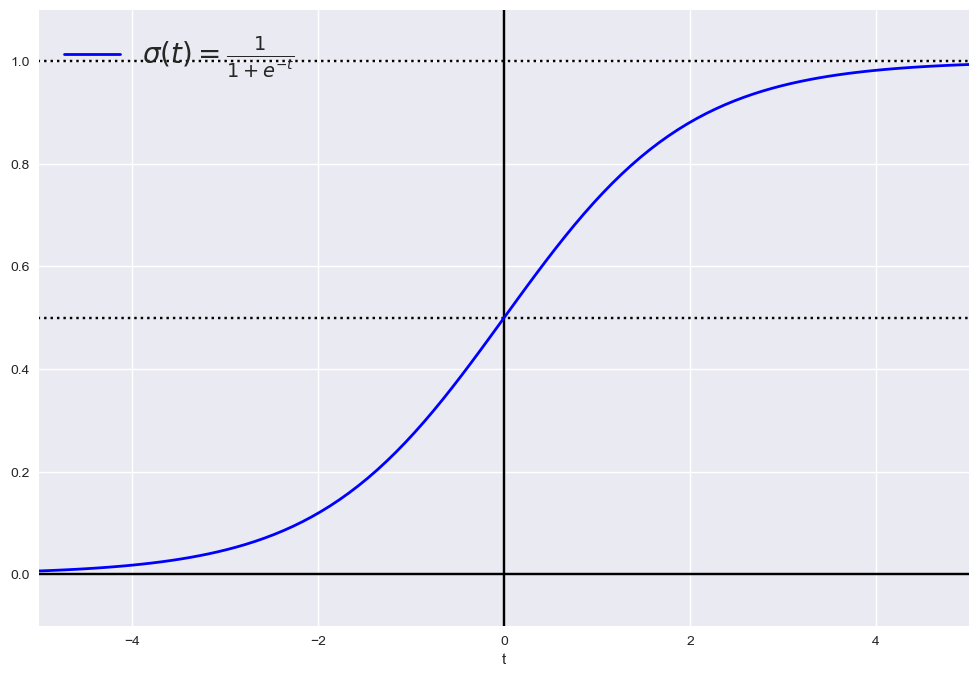

In [4]:
# shape of logistic function

t = np.linspace(-5, 5, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 8))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

#### Logistic Regression in scikit-learn

- One can use l1 and l2 penalty for logistic regression. 
  - The default is l2.
- Hyperparameter of sklearn LogisticRegression is C, which is the inverse of alpha:
  - the higher C, the less regularization

In [5]:
# Implementing Logistic Regression using Scikit-Learn
# preprocess data

df.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [6]:
# transform the categorical features into dummy variables

temp = pd.get_dummies(df[['sex', 'class', 'adult_male', 'alone']]).replace({False: 0, True:1})
temp = pd.concat([temp, df[['pclass', 'fare', 'sibsp', 'parch']]], axis=1)
temp.head()

,adult_male,alone,sex_female,sex_male,class_First,class_Second,class_Third,pclass,fare,sibsp,parch
0,1,0,0,1,0,0,1,3,7.2500,1,0
1,0,0,1,0,1,0,0,1,71.2833,1,0
2,0,1,1,0,0,0,1,3,7.9250,0,0
3,0,0,1,0,1,0,0,1,53.1000,1,0
4,1,1,0,1,0,0,1,3,8.0500,0,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score

y = df.survived
X = temp.copy()

lg = LogisticRegression()
lg.fit(X,y)
predicted = lg.predict(X)   # y_hat을 구한 것임
accuracy_score(y,predicted)

0.8215488215488216

In [8]:
# Cross-validation (KFold)
cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

array([0.82222222, 0.85393258, 0.7752809 , 0.85393258, 0.82022472,
       0.7752809 , 0.80898876, 0.7752809 , 0.85393258, 0.85393258])

In [9]:
# Cross-validation (train test split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)
accuracy_score(y_test, predicted)

0.8134328358208955

In [10]:
# what about other metrics?

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [11]:
confusion_matrix(y_test, predicted)

array([[138,  19],
       [ 31,  80]], dtype=int64)

In [12]:
# hyperparameters (Gridsearch)
from sklearn.model_selection import GridSearchCV

penalties = ['l2', 'elasticnet', 'none']
intercepts = [True, False]
C = [0.001, 0.01, 0.1, 0., 1.0, 10.0, 100.0, 1000.0]
model = LogisticRegression()

hyperparameters = {'fit_intercept':intercepts,
                   'penalty':penalties,
                   'C':C}

gsearch = GridSearchCV(model, hyperparameters, verbose=1)
gsearch.fit(X_train, y_train, )

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.0, 1.0, 10.0, 100.0, 1000.0],
                         'fit_intercept': [True, False],
                         'penalty': ['l2', 'elasticnet', 'none']},
             verbose=1)

In [13]:
gsearch.best_params_

{'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'}

In [14]:
model = LogisticRegression(**gsearch.best_params_)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.65      0.96      0.77       157
           1       0.83      0.26      0.40       111

    accuracy                           0.67       268
   macro avg       0.74      0.61      0.59       268
weighted avg       0.72      0.67      0.62       268

